### Import

In [ ]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

# Import các mô hình học máy
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import công cụ xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

### Load data

In [ ]:
# Định nghĩa đường dẫn tới các tệp dữ liệu
train_file_full = 'KDDTrain+.txt'
test_file = 'KDDTest+.txt'

# Đọc dữ liệu từ các tệp
df = pd.read_csv(train_file_full)
test_df = pd.read_csv(test_file)


In [ ]:
# Thêm tên cột vào tập dữ liệu
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'
]

df.columns = column_names
test_df.columns = column_names

# sanity check
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


### Transform

In [ ]:
# Chuyển đổi nhãn tấn công thành nhị phân
df['attack_flag'] = df['attack'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack_flag'] = test_df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

# Kiểm tra dữ liệu
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


### Feature Enginering

In [ ]:
# Mã hóa các đặc trưng phân loại
categorical_features = ['protocol_type', 'service', 'flag']
encoded_features = pd.get_dummies(df[categorical_features])
test_encoded_base = pd.get_dummies(test_df[categorical_features])

In [ ]:
test_encoded_base.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
encoded_features.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Xử lý sự khác biệt giữa tập huấn luyện và tập kiểm tra
test_index = np.arange(len(test_df))
missing_columns = list(set(encoded_features.columns) - set(test_encoded_base.columns))
test_missing_df = pd.DataFrame(0, index=test_index, columns=missing_columns)
test_encoded_aligned = test_encoded_base.join(test_missing_df)

# Đảm bảo thứ tự cột nhất quán
test_encoded_final = test_encoded_aligned[encoded_features.columns].fillna(0)

# Các đặc trưng số
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# Chuẩn bị dữ liệu cho mô hình
dataset_prepared = encoded_features.join(df[numeric_features])
test_data_prepared = test_encoded_final.join(test_df[numeric_features])

# Kiểm tra dữ liệu
dataset_prepared.head()


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,146,0
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,0,0,0
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,232,8153
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0,199,420
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [ ]:
dataset_prepared.describe()

,duration,src_bytes,dst_bytes
count,125972.000000,1.259720e+05,1.259720e+05
mean,287.146929,4.556710e+04,1.977927e+04
std,2604.525522,5.870354e+06,4.021285e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,4.400000e+01,0.000000e+00
75%,0.000000,2.760000e+02,5.160000e+02
max,42908.000000,1.379964e+09,1.309937e+09


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056,0.465421
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512,0.498805
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [ ]:
# Tạo tập nhãn mục tiêu
target_binary = df['attack_flag']
test_target_binary = test_df['attack_flag']

# Chia tập dữ liệu thành huấn luyện và kiểm tra
train_X, val_X, train_y, val_y = train_test_split(dataset_prepared, target_binary, test_size=0.3)


### Fit model

In [ ]:
# Xây dựng mô hình phân loại nhị phân
binary_model = RandomForestClassifier()
binary_model.fit(train_X, train_y)
binary_predictions = binary_model.predict(val_X)

# Tính toán độ chính xác ban đầu
initial_rf_accuracy = accuracy_score(binary_predictions, val_y)
initial_rf_accuracy

0.9934906858594411

### Confusion Matrix

In [ ]:
def generate_confusion_matrix(dataset, predictions, true_labels):
    # Tạo một Series từ các dự đoán và gán chỉ mục là chỉ mục của true_labels
    predicted_series = pd.Series(predictions, index=true_labels.index)

    # Kết hợp dữ liệu gốc với các giá trị dự đoán và giá trị thực tế
    combined_data = dataset.copy()
    combined_data['predicted'] = predicted_series
    combined_data['actual'] = true_labels

    # Loại bỏ các hàng có giá trị NaN
    clean_data = combined_data.dropna()

    # Tính toán ma trận nhầm lẫn
    confusion = confusion_matrix(clean_data['actual'], clean_data['predicted'])

    return confusion

<Axes: >

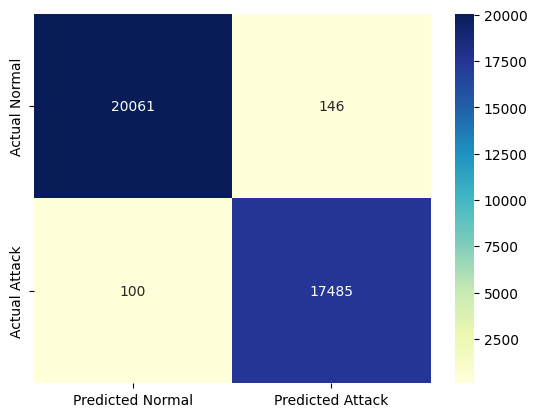

In [ ]:
# capture our prediction data
binary_prediction_data = generate_confusion_matrix(df,
                                         binary_predictions,
                                         val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data,#['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [ ]:
# Save model
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(binary_model, model_file)